In [1]:
# 指定图像文件夹路径
image_folder = 'Attachment_2'

In [2]:
import sys
import os
import cv2
# 文件夹路径
folder_path = 'Attachment_1'

# 初始化标记列表
marked_indices = []



import numpy as np

def myGaussianFilter(src, dst, ksize, sigma):
    # 定义一个用于高斯滤波的卷积核
    kernel = cv2.getGaussianKernel(ksize, sigma)

    # 将滤波器应用到源图像上
    dst = cv2.filter2D(src, -1, kernel * kernel.T)

# [1] 读取图像
src = cv2.imread('Attachment_1/1.jpg')

# 检查图像是否成功读取
if src is None:
    print("Error: Unable to read the image.")
    sys.exit(1)
# [2] 创建目标图像
dst = np.zeros_like(src)

# [3] 使用卷积核大小为5，sigma为1.5的高斯滤波
myGaussianFilter(src, dst, 5, 1.5)

# [4] 显示图像
cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

def myGaussianFilter(src, n, sigma):
    # [1] 初始化
    dst = src.copy()
    # [2] 彩色图片通道分离
    channels = cv2.split(src)
    # [3] 滤波
    # [3-1] 确定高斯正态矩阵
    array = getGaussianArray(n, sigma)
    # [3-2] 高斯滤波处理
    for i in range(3):
        gaussian(channels[i], array, n)
    # [4] 合并返回
    dst = cv2.merge(channels)
    return dst

def getGaussianArray(arr_size, sigma):
    # [1] 初始化权值数组
    array = np.zeros((arr_size, arr_size))
    # [2] 高斯分布计算
    center_i, center_j = arr_size // 2, arr_size // 2
    pi = 3.141592653589793
    sum_val = 0.0
    # [2-1] 高斯函数
    for i in range(arr_size):
        for j in range(arr_size):
            array[i, j] = np.exp(-1.0 * ((i - center_i)**2 + (j - center_j)**2) / (2.0 * sigma**2))
            sum_val += array[i, j]

    # [2-2] 归一化求权值
    array /= sum_val
    return array

def gaussian(src, array, size):
    temp = src.copy()
    # [1] 扫描
    for i in range(src.shape[0]):
        for j in range(src.shape[1]):
            # [2] 忽略边缘
            if i > size // 2 - 1 and j > size // 2 - 1 and i < src.shape[0] - size // 2 and j < src.shape[1] - size // 2:
                # [3] 找到图像输入点 f(i,j)，以输入点为中心与核中心对齐
                #     核心为中心参考点，卷积算子=>高斯矩阵 180 度转向计算
                #     x, y 代表卷积核的权值坐标，i, j 代表图像输入点坐标
                #     卷积算子：(f * g)(i, j) = f(i - k, j - l) * g(k, l)，f 代表图像输入，g 代表核
                #     带入核参考点：(f * g)(i, j) = f(i - (k - ai), j - (l - aj)) * g(k, l)，ai, aj 核参考点
                #     加权求和，注意：核的坐标以左上 0,0 起点
                sum_val = 0.0
                for k in range(size):
                    for l in range(size):
                        sum_val += src[i - k + size // 2, j - l + size // 2] * array[k, l]
                # 放入中间结果，计算所得的值与没有计算的值不能混用
                temp[i, j] = sum_val

    # 放入原图
    src[:, :] = temp

# 示例使用
src = cv2.imread("Attachment_2/1.jpg")

# 传递源图像、滤波器尺寸和 sigma 到 myGaussianFilter 函数
result = myGaussianFilter(src, 5, 1.5)

# 显示结果

#cv2.imshow("Result", result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [1]:
#导入图像处理库opencv
import cv2
import numpy as np
import matplotlib.pyplot as plt
#读取第一张图像
img=cv2.imread("Attachment_1/2_processed")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#BGR转换为灰度
img= cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)#BGR转换为RGB显示格式
plt.imshow(img)  
plt.title('Grey')    
plt.axis('off')#关闭坐标轴  设置为on则表示开启坐标轴
cv2.imwrite("1_grey_Gaus.jpg", gray)
plt.show()#显示图像

#导入图像处理库opencv

#读取第1.1张图像
img=cv2.imread("1_Gaus.jpg")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#BGR转换为灰度
img= cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)#BGR转换为RGB显示格式
plt.imshow(img)  
plt.title('Grey')    
plt.axis('off')#关闭坐标轴  设置为on则表示开启坐标轴
plt.show()#显示图像
cv2.imwrite("2_grey_Gaus.jpg", gray)

[ WARN:0@0.285] global loadsave.cpp:248 findDecoder imread_('Attachment_1/2_processed'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

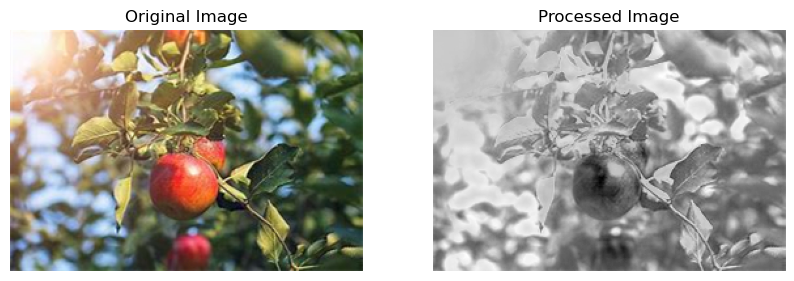

True

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread("Attachment_1/1.jpg")

# 转换为RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 提取红色和绿色通道
red_channel = img_rgb[:, :, 0]
green_channel = img_rgb[:, :, 1]

# 对红色通道降低亮度，对绿色通道增加亮度
red_channel = cv2.subtract(255, red_channel)
green_channel = cv2.addWeighted(green_channel, 1.5, np.zeros_like(green_channel), 0, 0)

# 合并处理后的通道
result_img = cv2.merge([red_channel, green_channel, img_rgb[:, :, 2]])

# 转换为灰度图像
gray = cv2.cvtColor(result_img, cv2.COLOR_RGB2GRAY)

# 显示原图和处理后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

# 保存处理后的灰度图像
cv2.imwrite("red有点高.jpg", gray)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

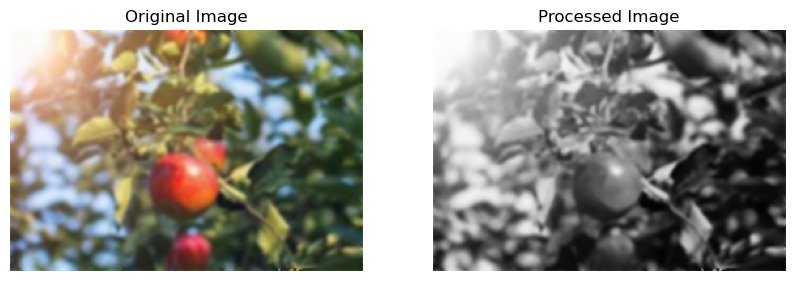

True

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread("1_Gaus.jpg")

# 转换为RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 提取红色、绿色和蓝色通道
red_channel = img_rgb[:, :, 0]
green_channel = img_rgb[:, :, 1]
blue_channel = img_rgb[:, :, 2]

# 对红色通道增加亮度，对绿色和蓝色通道降低亮度
red_channel = cv2.addWeighted(red_channel, 1.5, np.zeros_like(red_channel), 0, 0)
green_channel = cv2.subtract(green_channel, 50)
blue_channel = cv2.subtract(blue_channel, 50)

# 合并处理后的通道
result_img = cv2.merge([red_channel, green_channel, blue_channel])

# 转换为灰度图像
gray = cv2.cvtColor(result_img, cv2.COLOR_RGB2GRAY)

# 显示原图和处理后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

# 保存处理后的灰度图像
cv2.imwrite("processed_image.jpg", gray)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

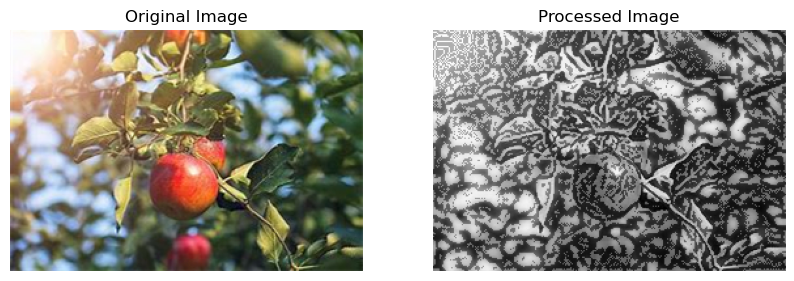

True

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread("Attachment_1/1.jpg")

# 转换为RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 提取红色通道
red_channel = img_rgb[:, :, 0]

# 对红色通道进行高斯模糊和拉普拉斯算子处理
blurred = cv2.GaussianBlur(red_channel, (5, 5), 0)
sharp = cv2.Laplacian(blurred, cv2.CV_64F)

# 将红色通道加回到图像中
result_img = np.zeros_like(img_rgb)
result_img[:, :, 0] = sharp
result_img[:, :, 1] = img_rgb[:, :, 1]
result_img[:, :, 2] = img_rgb[:, :, 2]

# 转换为灰度图像
gray = cv2.cvtColor(result_img, cv2.COLOR_RGB2GRAY)

# 显示原图和处理后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

# 保存处理后的灰度图像
cv2.imwrite("processed_image.jpg", gray)

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread('Attachment_2/2_processed.jpg')


# 将红色通道加回到图像中
result_img = np.zeros_like(img_rgb)
result_img[:, :, 0] = blurred
result_img[:, :, 1] = img_rgb[:, :, 1]
result_img[:, :, 2] = img_rgb[:, :, 2]

# 转换为灰度图像
gray = cv2.cvtColor(result_img, cv2.COLOR_RGB2GRAY)

# 显示原图和处理后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

# 保存处理后的灰度图像
cv2.imwrite("processed_image.jpg", gray)

[ WARN:0@526.038] global loadsave.cpp:248 findDecoder imread_('Attachment_2/2_processed.jpg'): can't open/read file: check file path/integrity


NameError: name 'img_rgb' is not defined

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

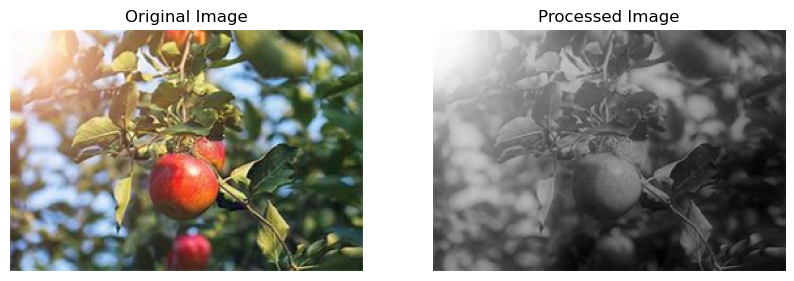

True

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread("Attachment_1/1.jpg")

# 转换为RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 提取红色和绿色通道
red_channel = img_rgb[:, :, 0]
green_channel = img_rgb[:, :, 1]

# 对红色通道进行高斯模糊处理（不模糊）
blurred_red = red_channel
laplacian_red = cv2.Laplacian(red_channel, cv2.CV_64F,ksize=5)

# 对绿色通道进行高斯模糊处理
blurred_green = cv2.GaussianBlur(green_channel, (75, 75), 0)

# 合并处理后的通道
result_img = cv2.merge([blurred_red, blurred_green, img_rgb[:, :, 2]])

# 转换为灰度图像
gray = cv2.cvtColor(result_img, cv2.COLOR_RGB2GRAY)

# 显示原图和处理后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

# 保存处理后的灰度图像
cv2.imwrite("3_grey_Gaus.jpg", gray)

In [1]:
import cv2

img = cv2.imread('1_grey_Gaus.jpg')
# 转为灰度图
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = new_img.shape[0:2]

# 设置阈值
thresh = 90

# 遍历每一个像素点
for row in range(height):
    for col in range(width):
        # 获取到灰度值
        gray = new_img[row, col]
        # 如果灰度值高于阈值 就等于255最大值
        if gray > thresh:
            new_img[row, col] = 255
        # 如果小于阈值，就直接改为0
        elif gray < thresh:
            new_img[row, col] = 0

cv2.imshow('img', new_img)
cv2.waitKey()


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread("Attachment_1/1.jpg")

# 转换为RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 提取红色和绿色通道
red_channel = img_rgb[:, :, 0]
green_channel = img_rgb[:, :, 1]

# 对红色通道进行拉普拉斯滤波
# 对红色通道进行阈值化以增强红色
threshold_value = 120  # 设置阈值，根据实际情况调整
_, red_mask = cv2.threshold(red_channel, threshold_value, 255, cv2.THRESH_BINARY)
laplacian_red = cv2.Laplacian(red_channel, cv2.CV_64F, ksize=5)

# 对绿色通道进行高斯模糊处理
blurred_green = cv2.GaussianBlur(green_channel, (75, 75), 0)

# 将红色部分阈值化为白色，其余部分阈值化为黑色
threshold_value = 50  # 根据实际情况调整阈值
ret, red_thresholded = cv2.threshold(np.abs(laplacian_red), threshold_value, 255, cv2.THRESH_BINARY)

# 合并处理后的通道
result_img = cv2.merge([red_thresholded, blurred_green, img_rgb[:, :, 2]])

# 转换为灰度图像
gray = cv2.cvtColor(result_img, cv2.COLOR_RGB2GRAY)

# 显示原图和处理后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

# 保存处理后的灰度图像
cv2.imwrite("3_grey_thresholded.jpg", gray)

error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/core/src/merge.dispatch.cpp:129: error: (-215:Assertion failed) mv[i].size == mv[0].size && mv[i].depth() == depth in function 'merge'


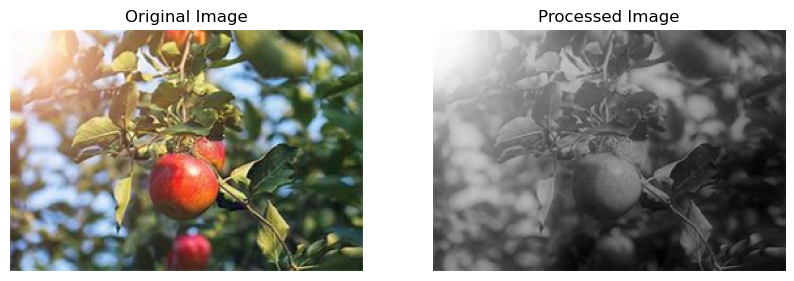

True

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread("Attachment_1/1.jpg")

# 转换为RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 提取红色和绿色通道
red_channel = img_rgb[:, :, 0]
green_channel = img_rgb[:, :, 1]

# 对红色通道进行高斯模糊处理（不模糊）
blurred_red = red_channel
laplacian_red = cv2.Laplacian(red_channel, cv2.CV_64F, ksize=5)

# 对绿色通道进行高斯模糊处理
blurred_green = cv2.GaussianBlur(green_channel, (75, 75), 0)

# 合并处理后的通道
result_img = cv2.merge([blurred_red, blurred_green, img_rgb[:, :, 2]])

# 转换为灰度图像
gray = cv2.cvtColor(result_img, cv2.COLOR_RGB2GRAY)

# 降低高光亮度
alpha = 0.7  # 调整这个值来控制亮度
result_img = cv2.addWeighted(result_img, 1, np.zeros(result_img.shape, result_img.dtype), 0, -alpha)

# 转换为灰度图像
gray = cv2.cvtColor(result_img, cv2.COLOR_RGB2GRAY)

# 显示原图和处理后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

# 保存处理后的灰度图像
cv2.imwrite("3_grey_Gaus_lowlight.jpg", gray)

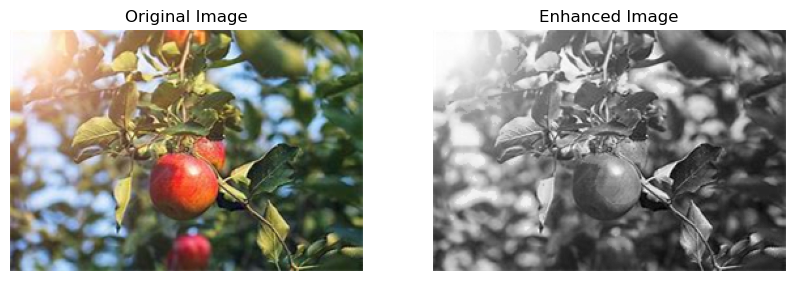

True

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread("Attachment_1/1.jpg")

# 转换为RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 提取红色通道
red_channel = img_rgb[:, :, 0]

# 对红色通道进行阈值化以增强红色
threshold_value = 200  # 设置阈值，根据实际情况调整
_, red_mask = cv2.threshold(red_channel, threshold_value, 255, cv2.THRESH_BINARY)

# 合并红色增强后的通道
enhanced_red = cv2.merge([red_mask, np.zeros_like(red_mask), np.zeros_like(red_mask)])
enhanced_img = cv2.addWeighted(img_rgb, 1, enhanced_red, 0.7, 0)  # 融合增强后的红色通道

# 转换为灰度图像
gray = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2GRAY)

# 显示原图和处理后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.show()

# 保存处理后的灰度图像
cv2.imwrite("enhanced_red_image.jpg", gray)

error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:674: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'arithm_op'


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:674: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'arithm_op'


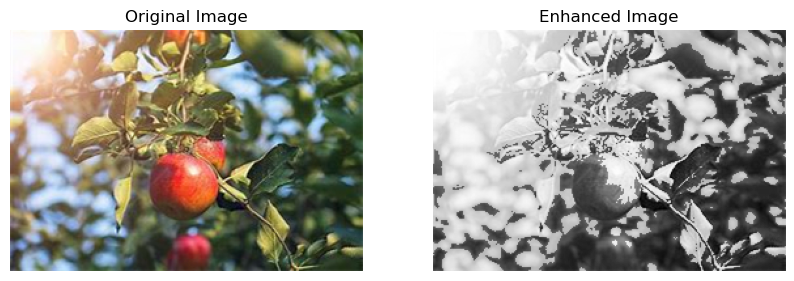

True

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread("Attachment_1/1.jpg")

# 转换为RGB格式
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 提取绿色通道
green_channel = img_rgb[:, :, 1]  # 1表示绿色通道

# 对绿色通道进行阈值化，将含有绿色像素的部分转换为黑色
threshold_value = 100  # 设置阈值，根据实际情况调整
_, green_mask = cv2.threshold(green_channel, threshold_value, 0, cv2.THRESH_TOZERO)
_, green_mask = cv2.threshold(green_mask, 1, 255, cv2.THRESH_BINARY)

# 合并绿色增强后的通道
enhanced_green = cv2.merge([np.zeros_like(green_mask), green_mask, np.zeros_like(green_mask)])
enhanced_img = cv2.addWeighted(img_rgb, 1, enhanced_green, 0.7, 0)  # 融合增强后的绿色通道

# 转换为灰度图像
gray = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2GRAY)

# 显示原图和处理后的图像
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Enhanced Image')
plt.axis('off')

plt.show()

# 保存处理后的灰度图像
cv2.imwrite("enhanced_green_image.jpg", gray)

In [18]:
import cv2
import numpy as np

def unevenLightCompensate(img, blockSize):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    average = np.mean(gray)

    rows_new = int(np.ceil(gray.shape[0] / blockSize))
    cols_new = int(np.ceil(gray.shape[1] / blockSize))

    blockImage = np.zeros((rows_new, cols_new), dtype=np.float32)
    for r in range(rows_new):
        for c in range(cols_new):
            rowmin = r * blockSize
            rowmax = (r + 1) * blockSize
            if (rowmax > gray.shape[0]):
                rowmax = gray.shape[0]
            colmin = c * blockSize
            colmax = (c + 1) * blockSize
            if (colmax > gray.shape[1]):
                colmax = gray.shape[1]

            imageROI = gray[rowmin:rowmax, colmin:colmax]
            temaver = np.mean(imageROI)
            blockImage[r, c] = temaver

    blockImage = blockImage - average
    blockImage2 = cv2.resize(blockImage, (gray.shape[1], gray.shape[0]), interpolation=cv2.INTER_CUBIC)
    gray2 = gray.astype(np.float32)
    dst = gray2 - blockImage2
    dst = dst.astype(np.uint8)
    dst = cv2.GaussianBlur(dst, (3, 3), 0)
    dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

    return dst

if __name__ == '__main__':
    file = '1_Gaus.jpg'
    blockSize = 16
    img = cv2.imread(file)
    dst = unevenLightCompensate(img, blockSize)

    result = np.concatenate([img, dst], axis=1)

    cv2.imshow('result', result)
    cv2.waitKey(0)

In [2]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('Attachment_2/2_processed.jpg')

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 指定高斯滤波器的标准差
sigma = 10

# 生成高斯滤波器
gaussian_filter = cv2.getGaussianKernel(5, sigma)
gaussian_filter = np.outer(gaussian_filter, gaussian_filter)

# 进行高斯滤波
result = cv2.filter2D(gray_image, -1, gaussian_filter)

# 显示原始图像和滤波后的图像
cv2.imshow('Original Image', gray_image)
cv2.imshow('Gaussian Filtered Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

[ WARN:0@75.989] global loadsave.cpp:248 findDecoder imread_('Attachment_2/2_processed.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [8]:
#高斯模糊
import cv2

# 读取图像
image = cv2.imread('Attachment_2/3_processed.jpg')

# 指定高斯内核大小和标准差
kernel_size = (5, 5)
sigma = 1.0

# 进行高斯模糊
blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)

print(image)
# 显示原始图像和模糊后的图像
cv2.imshow('Original Image', image)
cv2.imshow('Gaussian Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(image)

[ WARN:0@216.896] global loadsave.cpp:248 findDecoder imread_('Attachment_2/3_processed.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'


In [3]:
import cv2

# 读取图像
image = cv2.imread('Attachment_2/3_processed.jpg')

# 指定高斯内核大小和标准差
kernel_size = (5, 5)
sigma = 1.0

# 进行高斯模糊
blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)

# 显示原始图像和模糊后的图像
cv2.imshow('Original Image', image)
cv2.imshow('Gaussian Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[ WARN:0@32.513] global loadsave.cpp:248 findDecoder imread_('Attachment_2/3_processed.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'
